# Music Genre Classification

[GTZAN Dataset on Kaggle](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification) 

Used libraries:
- librosa, librosa.display
- matplotlib
- numpy
- os
- math
- json

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

In [3]:
import librosa, librosa.display

In [4]:
import matplotlib.pyplot as plt

In [5]:
example_file = "/content/drive/MyDrive/Capstone/blues.00001.wav"

In [6]:
# load audio file with Librosa
signal, sample_rate = librosa.load(example_file)

In [7]:
print(signal)

[ 0.00341797  0.00430298  0.00137329 ... -0.11953735 -0.17495728
 -0.15118408]


In [8]:
print(sample_rate)

22050


In [9]:
FIG_SIZE = (16,8)

Text(0.5, 1.0, 'Waveform')

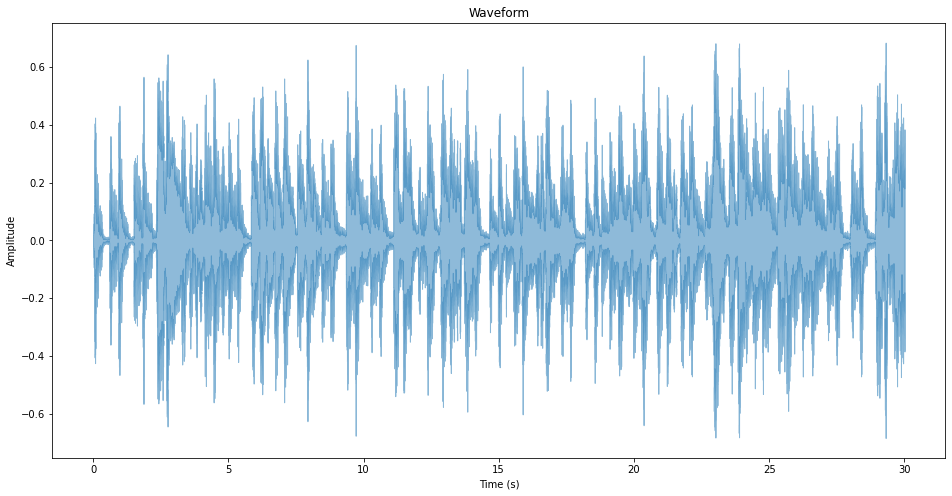

In [10]:
# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [11]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)

In [12]:
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)

In [13]:
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power Spectrum')

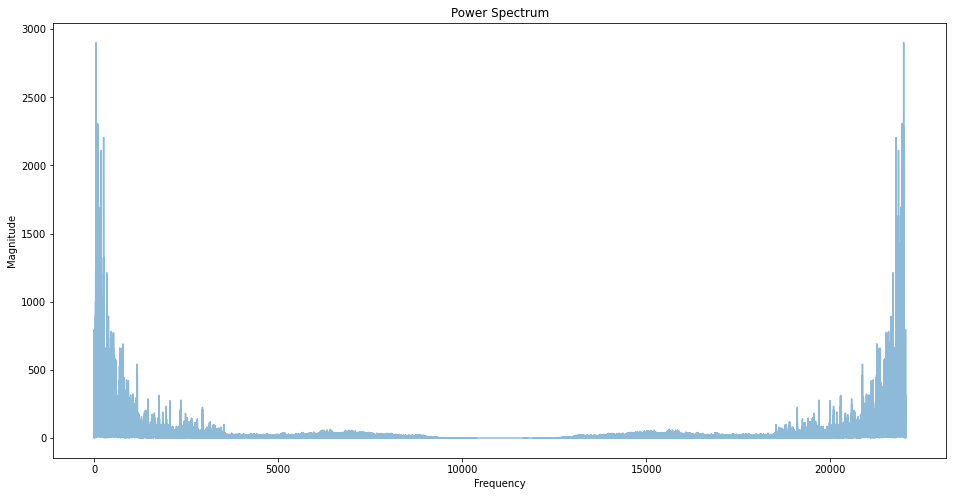

In [14]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [15]:
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

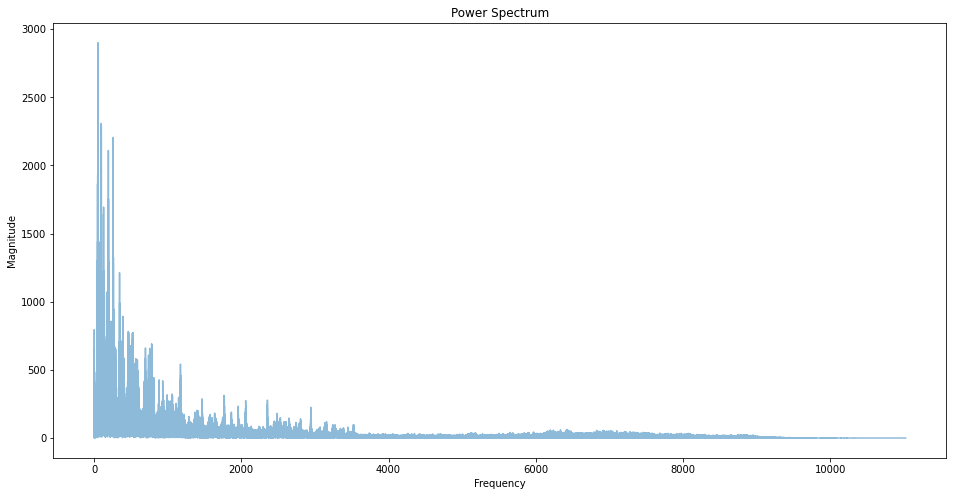

In [16]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [17]:
# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [18]:
# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [19]:
# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

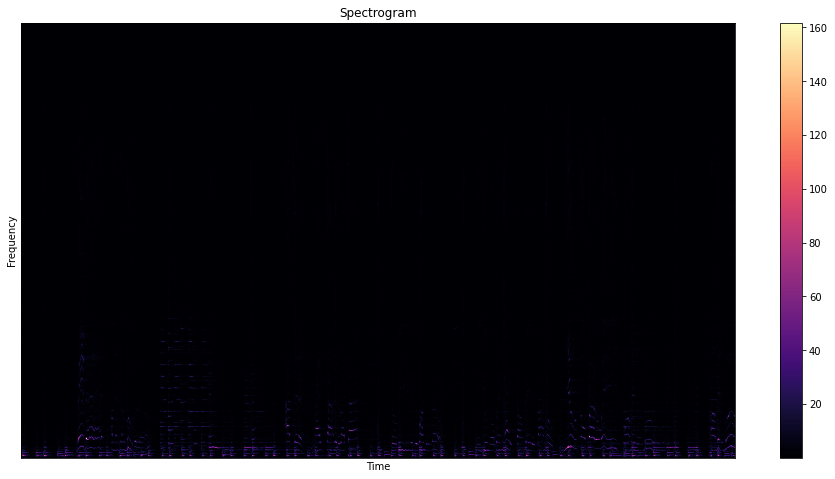

In [20]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [21]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

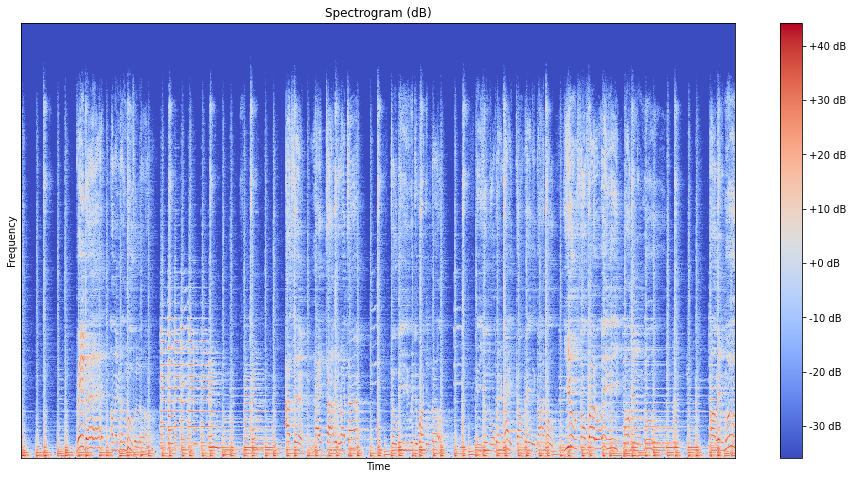

In [22]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [23]:
# MFCCs (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc = 13)

Text(0.5, 1.0, 'MFCCs')

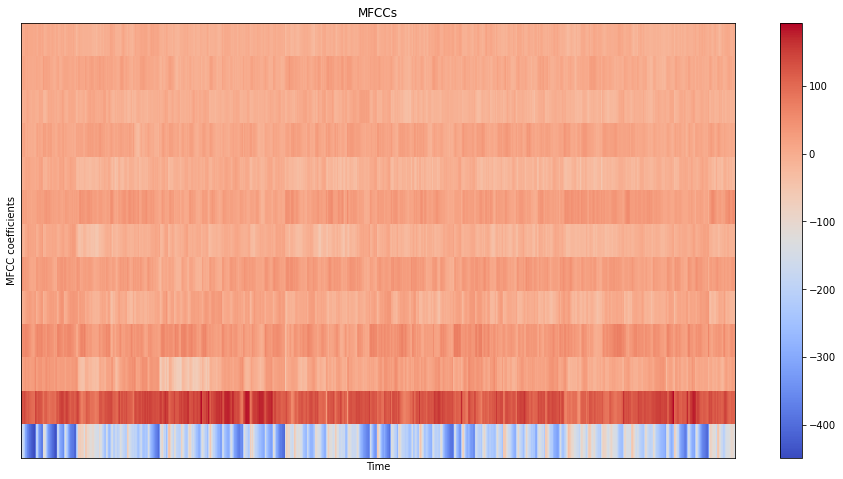

In [24]:
# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [25]:
import json
import os
import math

In [26]:
DATASET_PATH = "/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [33]:
def save_data1(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [34]:
save_data1(DATASET_PATH, JSON_PATH, num_segments=10)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio/fold6/jazz.00002.wav, segment:9
/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio/fold6/jazz.00002.wav, segment:10
/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio/fold6/jazz.00001.wav, segment:1
/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio/fold6/jazz.00001.wav, segment:2
/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio/fold6/jazz.00001.wav, segment:3
/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio/fold6/jazz.00001.wav, segment:4
/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio/fold6/jazz.00001.wav, segment:5
/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio/fold6/jazz.00001.wav, segment:6
/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio/fold6/jazz.00001.wav, segment:7
/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio/fold6/jazz.00001.wav, segment:8
/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio/fold6/jazz.00001.wav, segment:9
/content/drive/MyDrive/C

In [35]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

### Load Data

In [36]:
# path to json
DATA_PATH = "/content/data_10.json"

In [37]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [38]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [39]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Simple ANN

In [40]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [41]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [43]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
219/219 [==============================] - 6s 20ms/step - loss: 7.9493 - accuracy: 0.3120 - val_loss: 3.4232 - val_accuracy: 0.3491
Epoch 2/50
219/219 [==============================] - 5s 24ms/step - loss: 2.7125 - accuracy: 0.3782 - val_loss: 2.5740 - val_accuracy: 0.3861
Epoch 3/50
219/219 [==============================] - 6s 29ms/step - loss: 1.9917 - accuracy: 0.4413 - val_loss: 2.2220 - val_accuracy: 0.4125
Epoch 4/50
219/219 [==============================] - 5s 23ms/step - loss: 1.6157 - accuracy: 0.5086 - val_loss: 2.1690 - val_accuracy: 0.4298
Epoch 5/50
219/219 [==============================] - 5s 24ms/step - loss: 1.4050 - accuracy: 0.5560 - val_loss: 2.1239 - val_accuracy: 0.4508
Epoch 6/50
219/219 [==============================] - 5s 22ms/step - loss: 1.2324 - accuracy: 0.5984 - val_loss: 1.9933 - val_accuracy: 0.4785
Epoch 7/50
219/219 [==============================] - 4s 18ms/step - loss: 1.0835 - accuracy: 0.6374 - val_loss: 2.0752 - val_accuracy: 0.4742

In [44]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

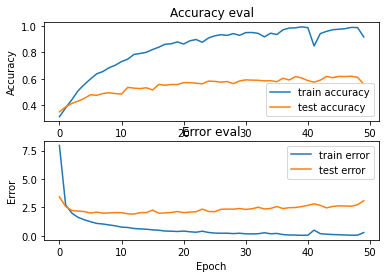

In [45]:
# plot accuracy and error as a function of the epochs
plot_history(history)

### Managing Overfitting

In [46]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [47]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
219/219 [==============================] - 7s 26ms/step - loss: 24.8217 - accuracy: 0.1706 - val_loss: 4.5249 - val_accuracy: 0.2247
Epoch 2/100
219/219 [==============================] - 5s 21ms/step - loss: 7.6070 - accuracy: 0.1849 - val_loss: 3.3526 - val_accuracy: 0.1974
Epoch 3/100
219/219 [==============================] - 7s 32ms/step - loss: 5.0054 - accuracy: 0.1732 - val_loss: 3.3522 - val_accuracy: 0.1774
Epoch 4/100
219/219 [==============================] - 5s 24ms/step - loss: 4.2060 - accuracy: 0.1826 - val_loss: 3.3893 - val_accuracy: 0.1674
Epoch 5/100
219/219 [==============================] - 5s 24ms/step - loss: 3.8248 - accuracy: 0.1801 - val_loss: 3.4043 - val_accuracy: 0.1634
Epoch 6/100
219/219 [==============================] - 6s 27ms/step - loss: 3.6616 - accuracy: 0.1776 - val_loss: 3.3623 - val_accuracy: 0.1687
Epoch 7/100
219/219 [==============================] - 4s 20ms/step - loss: 3.5388 - accuracy: 0.1894 - val_loss: 3.3045 - val_accuracy

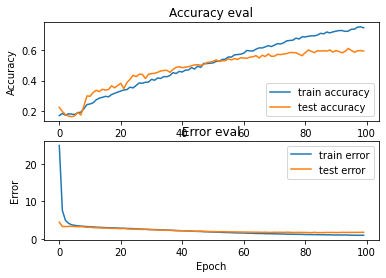

In [49]:
# plot accuracy and error as a function of the epochs
plot_history(history)

### Convolutional Neural Network (CNN)

In [50]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [51]:
X_train.shape

(5997, 130, 13, 1)

In [52]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [53]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [54]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                      

In [56]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 18s 83ms/step - loss: 2.3623 - accuracy: 0.2368 - val_loss: 1.8124 - val_accuracy: 0.3840
Epoch 2/50
188/188 [==============================] - 15s 78ms/step - loss: 1.8304 - accuracy: 0.3734 - val_loss: 1.5377 - val_accuracy: 0.4707
Epoch 3/50
188/188 [==============================] - 14s 75ms/step - loss: 1.6637 - accuracy: 0.4174 - val_loss: 1.4295 - val_accuracy: 0.5020
Epoch 4/50
188/188 [==============================] - 17s 88ms/step - loss: 1.5287 - accuracy: 0.4607 - val_loss: 1.3443 - val_accuracy: 0.5307
Epoch 5/50
188/188 [==============================] - 14s 77ms/step - loss: 1.4280 - accuracy: 0.4901 - val_loss: 1.2808 - val_accuracy: 0.5520
Epoch 6/50
188/188 [==============================] - 14s 74ms/step - loss: 1.3621 - accuracy: 0.5163 - val_loss: 1.2350 - val_accuracy: 0.5687
Epoch 7/50
188/188 [==============================] - 14s 75ms/step - loss: 1.2785 - accuracy: 0.5404 - val_loss: 1.1888 - val_accuracy:

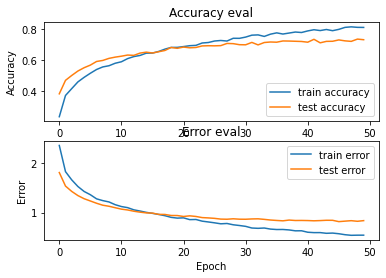

In [57]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [58]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 2s - loss: 0.8107 - accuracy: 0.7287 - 2s/epoch - 24ms/step

Test accuracy: 0.7286914587020874


In [59]:
model_cnn.save("Music_Genre_10_CNN")

In [60]:
model_cnn.save("Music_Genre_10_CNN.h5")

In [61]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

### Prediction on Test Set

In [62]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [63]:
X_to_predict.shape

(130, 13, 1)

In [64]:
print("Real Genre:", y_to_predict)

Real Genre: 8


In [65]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [66]:
X_to_predict.shape

(1, 130, 13, 1)

In [67]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)

1/1 [==============================] - 0s 164ms/step


In [68]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 8


In [69]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 3
1/1 [==============================] - 0s 28ms/step
Predicted Genre: 3


In [70]:
len(X_test)

2499

In [71]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 5
1/1 [==============================] - 0s 30ms/step
Predicted Genre: 5

Real Genre: 8
1/1 [==============================] - 0s 27ms/step
Predicted Genre: 8

Real Genre: 2
1/1 [==============================] - 0s 30ms/step
Predicted Genre: 2

Real Genre: 6
1/1 [==============================] - 0s 34ms/step
Predicted Genre: 6

Real Genre: 0
1/1 [==============================] - 0s 32ms/step
Predicted Genre: 3

Real Genre: 5
1/1 [==============================] - 0s 29ms/step
Predicted Genre: 5

Real Genre: 1
1/1 [==============================] - 0s 27ms/step
Predicted Genre: 1

Real Genre: 1
1/1 [==============================] - 0s 23ms/step
Predicted Genre: 1

Real Genre: 6
1/1 [==============================] - 0s 25ms/step
Predicted Genre: 6

Real Genre: 5
1/1 [==============================] - 0s 28ms/step
Predicted Genre: 3


### Prediction on New Song

In [ ]:
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [ ]:
genre_dict = {0:"hiphop",1:"country",2:"jazz",3:"classical",4:"metal",5:"pop",6:"rock",7:"blues",8:"reggae",9:"disco"}

In [ ]:
new_input_mfcc = process_input("/content/Dee Yan-Key - Carousel Ride.mp3", 30)

In [ ]:
type(new_input_mfcc)

In [ ]:
new_input_mfcc.shape

In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

In [ ]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

In [ ]:
new_input_mfcc = process_input("/content/Filmy Ghost (Sábila Orbe) - KD6-3.7.mp3", 30)

In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

In [ ]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])